<a href="https://colab.research.google.com/github/ash827/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/LS_DS_Unit_4_Sprint_Challenge_2_DSPT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:**<br>
A neuron is an individual node in a neural network.</br>
- **Input Layer:**<br>
This is the beginning layer that receives the input data. </br>
- **Hidden Layer:**<br>
This is the "inbetween" layer that performs calculations based on weights.</br>
- **Output Layer:**<br>
The output layer, like the other layers above, is self explanatory. It is the layer that outputs the value/prediction. </br>
- **Activation Function:**<br>
This function is used to "activate" weights of a neuron by applying them to a mathematical function (sigmoid, softmax, etc.)

Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

*Back* *propagation* is a math problem that is used to train a network that feeds data forward in neural networks. It helps computers learn from their mistakes in order to be better at computing things. The correct output is given by a human, and in turn the computer will keep "guessing" and getting better at showing the correct answer. 


*That* was harder than I thought!

Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

A Perceptron takes an input and multiplies each by a weight, sums it all up, and then the sum is passed through an activation function, the reult being the final value. 

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [0]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, PReLU
from tensorflow.keras.callbacks import EarlyStopping


In [0]:
model1 = Sequential([
                     Dense(1, activation = 'sigmoid'),
                     Dense(1, activation = 'sigmoid')
])#this is a simple "question", so I am keeping it simple 

In [0]:
#after creating the model, we need to compile it

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Side note: don't forget the brackets [] when choosing metrics :) 

In [0]:
#we can use EarlyStopping to help avoid overfitting 

stop = EarlyStopping(monitor = "accuracy", min_delta = 0.001, patience = 3)

In [6]:
h1 = model1.fit(X, y, epochs = 1000, verbose = 1)

Epoch 1/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.4633
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4767
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6931 - accuracy: 0.5267
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5267
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5267
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6924 - accuracy: 0.5267
Epoch 8/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5267
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6917 - accuracy: 0.5267
Epoch 10/1000
10/10 [==============================] - 0s 1ms/step - loss: 0.6920 - accuracy: 0.5267

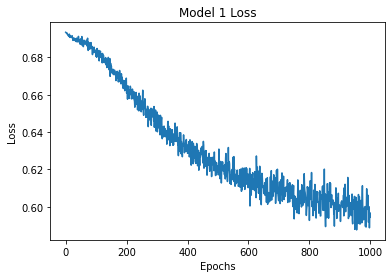

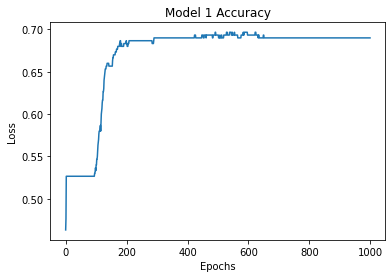

In [7]:
#Should we plot this out for S's and G's?? Let's see if we can work this visual
#out! 

#Taking a look at the loss :(
 
plt.plot(h1.history['loss'])
plt.title('Model 1 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Now let's see the accuracy!

plt.plot(h1.history['accuracy'])
plt.title('Model 1 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

#Cool!

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using Keras. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. You must also monitor the metric 'accuracy'.

In [0]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [0]:
#create model2

model2 = Sequential([
                     Dense(32, activation = 'relu'),
                     Dense(28, activation = 'relu'),
                     Dense(18, activation = 'relu'),
                     Dense(8, activation = 'relu'),
                     Dense(1, activation = 'relu')
])

In [0]:
#compile as we did with model1

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
#add in the EarlyStopping for model2 as well

#only 100 epochs, so I updated min_delta to 0.01 from 0.001 as with model1
#stop = EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 3)

#I looked into documentation because my visuals were showing spiking and not a
# curve so I found 'mode'
stop = EarlyStopping(monitor = 'accuracy', min_delta = 0.01, patience = 3, mode = 'max')

In [33]:
#fit the data as name as h2

#so I started with 1,000 on the epochs, but that proved to be WAY overkill
h2 = model2.fit(X, y, epochs = 100, verbose = 1)

Epoch 1/100
10/10 [==============================] - 0s 2ms/step - loss: 2.5574 - accuracy: 0.5233
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.9730 - accuracy: 0.5200
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.8275 - accuracy: 0.5267
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7821 - accuracy: 0.5567
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.5733
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6000
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6111 - accuracy: 0.6167
Epoch 8/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.6633
Epoch 9/100
10/10 [==============================] - 0s 2ms/step - loss: 0.5059 - accuracy: 0.7300
Epoch 10/100
10/10 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.7600
Epoch 11/

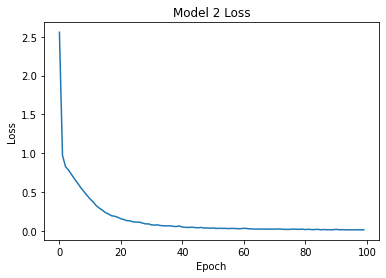

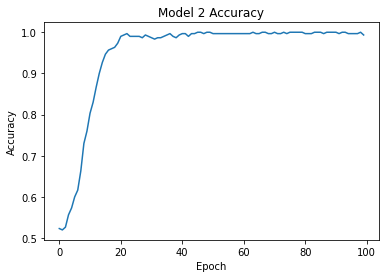

In [34]:
#I would like to plot this one as well. I enjoyed seeing them in the lecture, 
#so I like to plot whenever I can!

#Looking at the loss

plt.plot(h2.history['loss'])
plt.title('Model 2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

#Now for the Accuracy

plt.plot(h2.history['accuracy'])
plt.title('Model 2 Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

#much better results after utilizing 'Mode' 

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [35]:
pip install mlxtend

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


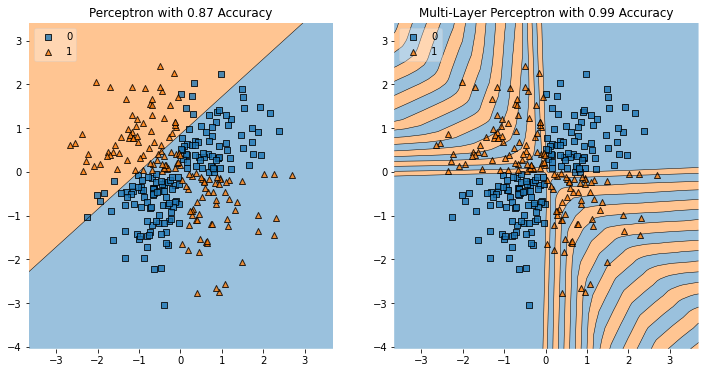

In [36]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

###*Multi-Layer* Perceptrons more accurately learn the relationship between X and y due to the computational power of the hidden layers! When you add those hidden layers, they train on a set of the input and output layers and they "learn" what the correlation between the inputs and outputs are. This is useful for complex data (such as images) because it'll "learn" by separating each pixel! Pretty cool right? 

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [37]:
#import and read the data
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1
41,48,1,1,130,245,0,0,180,0,0.2,1,0,2,1
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [38]:
#Let's first see if we have any null values since the head and shape were coded above

df.isnull().sum()

#looks to be ok

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [44]:
'''Time to split our data up, importing train_test_split
I will be splitting into training and validation data to use validation_data 
later. Going to try a 75/25 split'''

from sklearn.model_selection import train_test_split

#changing to 80/20
train, validate = train_test_split(df, train_size = 0.80, test_size = 0.20,
                                   stratify = df['target'], random_state = 42)

train.shape, validate.shape

((242, 14), (61, 14))

In [45]:
#Now we need to set up a baseline, keeping it simple

target = 'target'  #go figure ;)
y_train = train[target]
y_train.value_counts(normalize = True)

1    0.545455
0    0.454545
Name: target, dtype: float64

In [46]:
#On to the accuracy score
from sklearn.metrics import accuracy_score

majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

accuracy_score(y_train, y_pred)

#We can do better :)

0.5454545454545454

In [47]:
'''Now that we have our baseline accuracy, let's move onto 
arranging our X features and y targets, scaling and fitting the data'''

#X feature and y target

target = 'target'
X_train = train.drop(columns = target)
y_train = train[target]
X_val = validate.drop(columns = target)
y_val = validate[target]

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((242, 13), (242,), (61, 13), (61,))

In [0]:
#scaling and fitting

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [49]:
#Now we will take a look at the model before we tune it up! 

inputs = X_train_scaled.shape[1]
inputs

13

In [0]:
#Create the model

model = Sequential()

model.add(Dense(50, input_shape = (inputs,)))
model.add(Dense(35, activation='relu'))
model.add(Dense(22, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
#compile

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
#using our EarlyStopping method

stop = EarlyStopping(monitor = 'val_loss', min_delta = 0.0001, patience = 3, mode = 'min')

In [53]:
h1 = model.fit(X_train_scaled, y_train, epochs = 1000,
               validation_data = (X_val_scaled, y_val), callbacks = [stop])

#91% accuracy, not bad!

Epoch 1/1000
8/8 [==============================] - 0s 17ms/step - loss: 0.6622 - accuracy: 0.5455 - val_loss: 0.6043 - val_accuracy: 0.5902
Epoch 2/1000
8/8 [==============================] - 0s 7ms/step - loss: 0.5750 - accuracy: 0.6281 - val_loss: 0.5520 - val_accuracy: 0.7213
Epoch 3/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.5224 - accuracy: 0.7273 - val_loss: 0.5144 - val_accuracy: 0.7377
Epoch 4/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4938 - accuracy: 0.7851 - val_loss: 0.4849 - val_accuracy: 0.7541
Epoch 5/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4624 - accuracy: 0.8099 - val_loss: 0.4601 - val_accuracy: 0.7377
Epoch 6/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4409 - accuracy: 0.8223 - val_loss: 0.4367 - val_accuracy: 0.8033
Epoch 7/1000
8/8 [==============================] - 0s 6ms/step - loss: 0.4174 - accuracy: 0.8554 - val_loss: 0.4192 - val_accuracy: 0.8033
Epoch 8/1000
8/8 [=

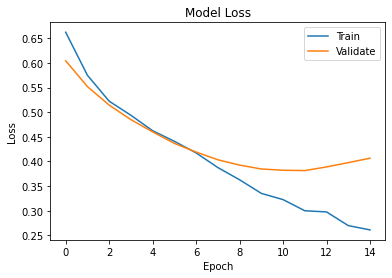

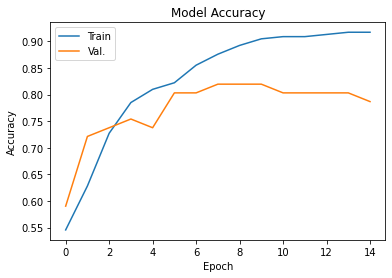

In [54]:
#ok and now to plot like always

#Loss first
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss']) #add in the validation loss with this one
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'])
plt.show()

#Then accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy']) #adding in validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val.'])
plt.show()


#Now we're going to use GridSearchCV for Hyperparameter Tuning

In [0]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

def create_model(learning_rate = 0.001, batch_size = 0):
  model = Sequential()
  
  model.add(Dense(32, input_shape = (13,)))
  model.add(Dense(26, activation = 'relu'))
  model.add(Dense(1, activation = 'sigmoid'))

  #Compile
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
  return model
  
#creating the keras classifier
keras_model = KerasClassifier(build_fn = create_model, verbose = 1)

learning_rate= [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 0.006,
             0.007, 0.008, 0.009, 0.01] 

batch_size = [0, 10, 20, 30]

params = {'learning_rate': [0.0005, 0.001, 0.0015, 0.002, 0.003, 0.004, 0.005, 
                         0.006, 0.007, 0.008, 0.009, 0.01], 
          'batch_size': [0, 10, 20, 30], 'epochs': [30]}
  
#Matching the batch size to the epochs :) 


In [62]:
#This is when lectures and notes are SUPER helpful! :) 
grid = GridSearchCV(estimator = keras_model, param_grid = params, n_jobs = -1,
                    verbose = 1, scoring = 'accuracy')
grid_result = grid.fit(X_train_scaled, y_train)

#getting mean, standard dev and parameters results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   35.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.8min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  3.3min finished


Epoch 1/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.3802
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 0.5717 - accuracy: 0.6901
Epoch 3/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4666 - accuracy: 0.8099
Epoch 4/30
25/25 [==============================] - 0s 1ms/step - loss: 0.4107 - accuracy: 0.8471
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3607 - accuracy: 0.8678
Epoch 6/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3374 - accuracy: 0.8678
Epoch 7/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3196 - accuracy: 0.8760
Epoch 8/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8802
Epoch 9/30
25/25 [==============================] - 0s 1ms/step - loss: 0.3050 - accuracy: 0.8884
Epoch 10/30
25/25 [==============================] - 0s 1ms/step - loss: 0.2940 - accuracy: 0.8843
Epoch 11/30
25/25 [

In [63]:
'''Last, let's look at the accuracy from our best result estimator
we just found, moving along into y_pred and y_val'''

pipeline = grid_result.best_estimator_
y_pred = pipeline.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_pred)
print("Keras Validation Accuracy=", val_accuracy)

#78% accuracy :) 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
7/7 [==============================] - 0s 1ms/step
Keras Validation Accuracy= 0.7868852459016393
